In [1]:
from PIL import Image
import math 
import numpy as np


In [2]:
name="SampleImages/rose_gray.jpg"

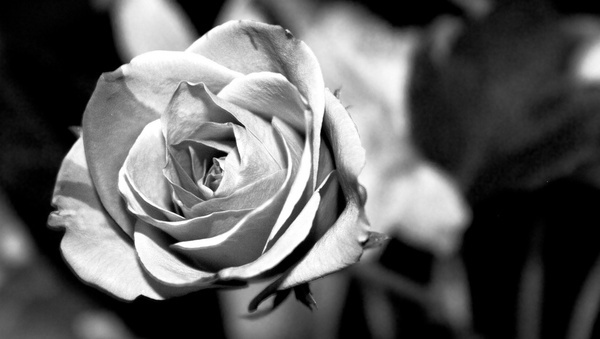

In [3]:
#opening unedited image
img = Image.open(name) 
img

In [4]:
#calculate width and height of the image
width, height = img.size
pixels=img.load()

## Blurring original image ( blurringFactor * blurringFactor  averaging mask)

In [5]:
def getBlurredPixel( blurredPixels , blurringfFactor , w , h , width , height):
    summation=0
    count=0
    for x in range(w-int(blurringFactor/2) , w+int(blurringFactor/2)):
        for y in range(h-int(blurringFactor/2),h+int(blurringFactor/2)):
            if((0<=x and x< width ) and (0<=y and y<height)):
                count+=1
                summation+=blurredPixels[x,y]
    return int(summation/count)

enter the blurring factor : 8


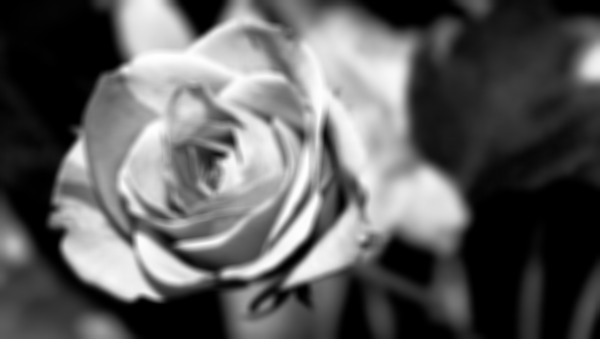

In [6]:
#using averaging mask
blurringFactor = int(input("enter the blurring factor : "))
blurredImage = Image.open(name)
blurredPixels = blurredImage.load() 
widthBlurredImage , heightBlurredImage = blurredImage.size
newBlurredPixels = np.empty((widthBlurredImage , heightBlurredImage))
for w in range(widthBlurredImage):
    for h in range(heightBlurredImage):
        newBlurredPixels[w][h]=getBlurredPixel(blurredPixels , blurringFactor , w , h ,widthBlurredImage , heightBlurredImage)

for w in range(widthBlurredImage):
    for h in range(heightBlurredImage):
        blurredPixels[w,h]=(int(newBlurredPixels[w][h]))
blurredImage        

## Creating mask for unsharp masking and high boosting

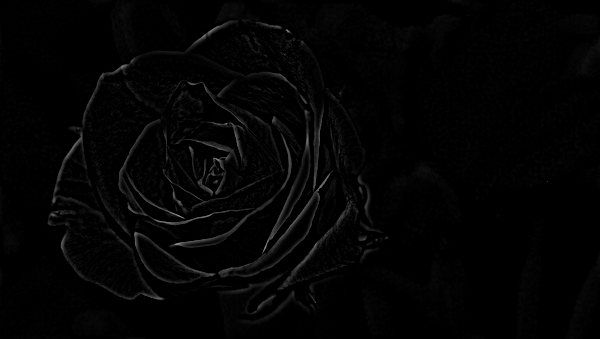

In [7]:
mask=Image.open(name)
widthMask,heightMask=mask.size
maskPixels=mask.load()
for w in range(widthMask):
    for h in range(heightMask):
        maskPixels[w,h]=pixels[w,h]-blurredPixels[w,h]
mask.save("SampleImages/rose_grey_mask_high_boosting.jpeg")
mask

## Unsharp Masking

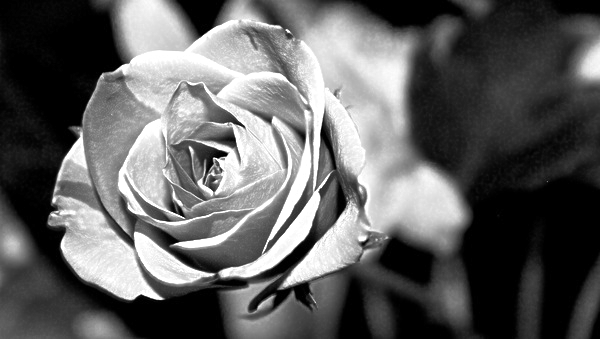

In [8]:

k=1
unsharpMaskedImage=Image.open(name)
unsharpMaskedPixels=unsharpMaskedImage.load()
for w in range(width):
    for h in range(height):
        unsharpMaskedPixels[w,h]=pixels[w,h]+k*maskPixels[w,h]
unsharpMaskedImage

## High Boosting

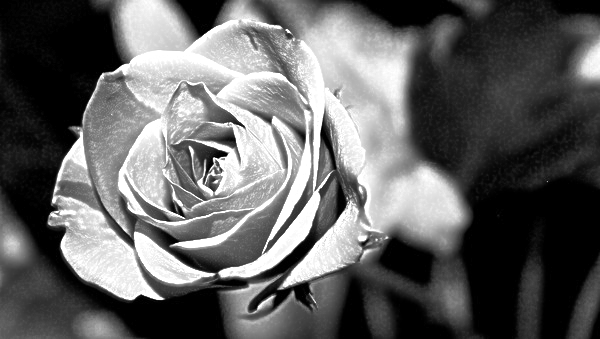

In [9]:
k=2 # ( k>1)
highBoostedImage=Image.open(name)
highBoostedPixels=highBoostedImage.load()
for w in range(width):
    for h in range(height):
        highBoostedPixels[w,h]=pixels[w,h]+k*maskPixels[w,h]
highBoostedImage